In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import cross_val_score, train_test_split
%matplotlib inline

In [2]:
#Importing the dataset

In [3]:
df=pd.read_csv('./Data/train_set.csv')

In [4]:
df.columns

Index(['Unnamed: 0', 'EDAD', 'GENERO', 'RESIDENCIA', 'NV_ESTUDIO',
       'ESTUDIO_PREV', 'TRACK_DH', 'AVG_DH', 'MINUTES_DH', 'EXPERIENCIA',
       'DIAS_EMP'],
      dtype='object')

In [5]:
#database with 8995 datapoints

In [6]:
df.shape

(8995, 11)

In [ ]:
#The variables that have on average 1300 null values.
#The average age of the Digital House students is 34 years
#The average performance in digital house is 3.5
#The average minutes dedicated to the course is 4419
#The average years of experience of digital house is 16.11
#The average days to find a job is 90

In [7]:
df.describe()

,Unnamed: 0,EDAD,AVG_DH,MINUTES_DH,EXPERIENCIA,DIAS_EMP
count,8995.000000,7668.000000,7651.000000,7619.000000,7618.000000,8995.000000
mean,5499.806115,33.989176,3.503228,4419.936461,16.112497,90.807449
std,2598.235516,5.024501,0.404276,524.528119,7.154829,5.675932
min,1000.000000,15.000000,2.100000,889.300000,0.000000,79.000000
25%,3249.500000,31.000000,3.200000,4345.850000,10.825000,86.000000
50%,5500.000000,34.000000,3.500000,4575.300000,16.200000,90.000000
75%,7749.500000,37.000000,3.800000,4676.100000,21.600000,95.000000
max,9999.000000,52.000000,4.900000,7466.500000,31.900000,115.000000


In [8]:
df.isnull().sum()

Unnamed: 0         0
EDAD            1327
GENERO          1375
RESIDENCIA      1357
NV_ESTUDIO      1372
ESTUDIO_PREV    1330
TRACK_DH        1281
AVG_DH          1344
MINUTES_DH      1376
EXPERIENCIA     1377
DIAS_EMP           0
dtype: int64

In [ ]:
#We will now find outliers and imbalances in the dataset

In [ ]:
#Not many outliers in the DIAS_EMP target variable, but all of them in the upper side of the distribution.
#The minimum days spent to find a job is 79

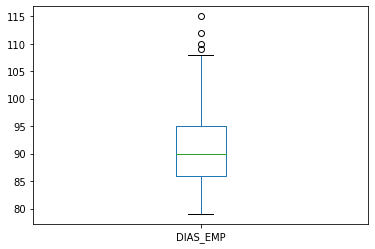

In [9]:
df['DIAS_EMP'].plot(kind='box')

In [ ]:
#In age, there are outliers in both the upper and lower sides of the distribution.
#There is a person with 15 years, who took 84 days in finding a job. The days to find a job are not an outlier
#so we are going to keep that data point for training.

In [12]:
df[df.EDAD==15]

,Unnamed: 0,EDAD,GENERO,RESIDENCIA,NV_ESTUDIO,ESTUDIO_PREV,TRACK_DH,AVG_DH,MINUTES_DH,EXPERIENCIA,DIAS_EMP
5481,6484,15.0,MASCULINO,ARGENTINA,TERTIARY,ENGINEERING,DATA,3.4,4547.4,1.3,84.0


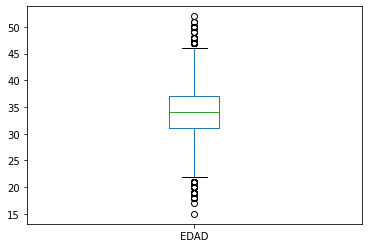

In [11]:
df['EDAD'].plot(kind='box')

In [ ]:
#In AVG_DH también hay outliers en ambos lados de la distribución

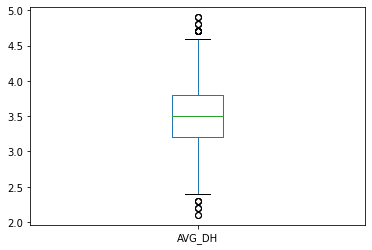

In [13]:
df['AVG_DH'].plot(kind='box')

In [ ]:
#The minutes DH variables has a lot of variance, great concentration around the mean but huge variability in both tales

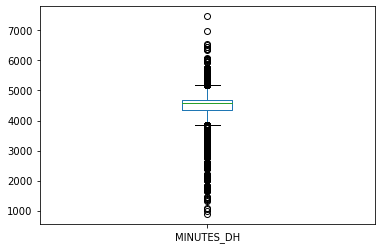

In [14]:
df['MINUTES_DH'].plot(kind='box')

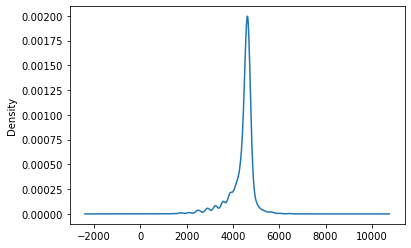

In [15]:
df['MINUTES_DH'].plot(kind='density')

In [ ]:
#No hay outliers en Experiencia

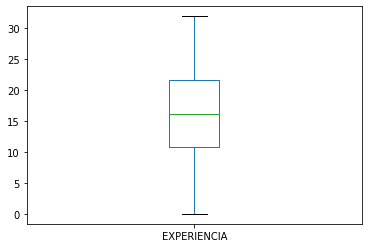

In [16]:
df['EXPERIENCIA'].plot(kind='box')

In [ ]:
#Genero

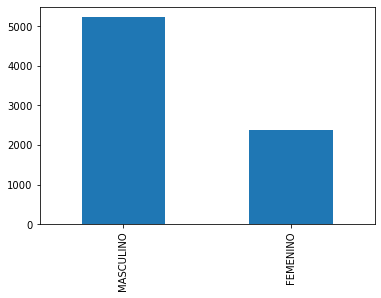

In [28]:
df['GENERO'].value_counts().plot(kind='bar')

In [ ]:
#Residencia

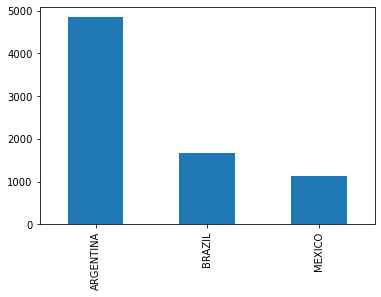

In [29]:
df['RESIDENCIA'].value_counts().plot(kind='bar')

In [ ]:
#NV ESTUDIO

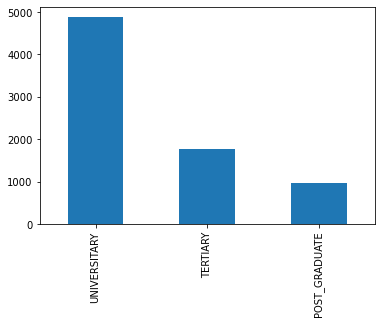

In [30]:
df['NV_ESTUDIO'].value_counts().plot(kind='bar')

In [ ]:
#Estudio Prev

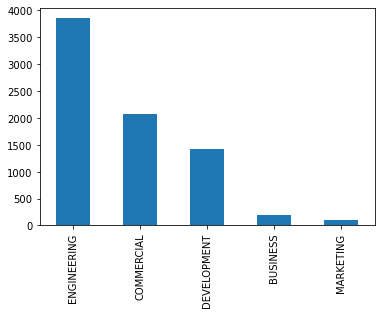

In [31]:
df['ESTUDIO_PREV'].value_counts().plot(kind='bar')

In [ ]:
#Course

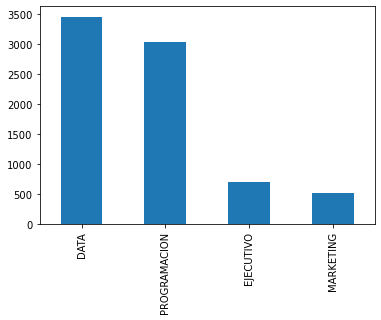

In [32]:
df['TRACK_DH'].value_counts().plot(kind='bar')

In [ ]:
# Double check for outliers, counting them with the IQR

In [17]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1
#df[df<(q1-1.5*iqr)|df>(q3+1.5*iqr)]

In [18]:
((df<(q1-1.5*iqr))|(df>(q3+1.5*iqr))).sum()

AVG_DH           25
DIAS_EMP          4
EDAD             94
ESTUDIO_PREV      0
EXPERIENCIA       0
GENERO            0
MINUTES_DH      966
NV_ESTUDIO        0
RESIDENCIA        0
TRACK_DH          0
Unnamed: 0        0
dtype: int64

In [19]:
(df<(q1-1.5*iqr)).sum()

AVG_DH            9
DIAS_EMP          0
EDAD             47
ESTUDIO_PREV      0
EXPERIENCIA       0
GENERO            0
MINUTES_DH      820
NV_ESTUDIO        0
RESIDENCIA        0
TRACK_DH          0
Unnamed: 0        0
dtype: int64

In [22]:
(df>(q3+1.5*iqr)).sum()

AVG_DH           16
DIAS_EMP          4
EDAD             47
ESTUDIO_PREV      0
EXPERIENCIA       0
GENERO            0
MINUTES_DH      146
NV_ESTUDIO        0
RESIDENCIA        0
TRACK_DH          0
Unnamed: 0        0
dtype: int64

In [ ]:
#Correlations
#AVG_DH and MINUTES_DH are the ones that exhibit less correlation with DIAS_EMP

In [37]:
correlations=df[['EDAD', 'GENERO', 'RESIDENCIA', 'NV_ESTUDIO',
       'ESTUDIO_PREV', 'TRACK_DH', 'AVG_DH', 'MINUTES_DH', 'EXPERIENCIA',
       'DIAS_EMP']].corr()

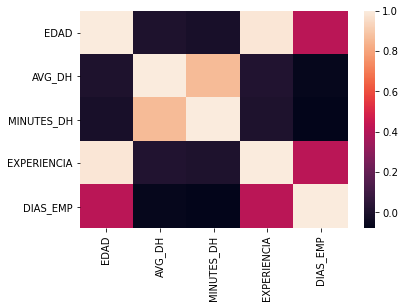

In [38]:
sns.heatmap(correlations)

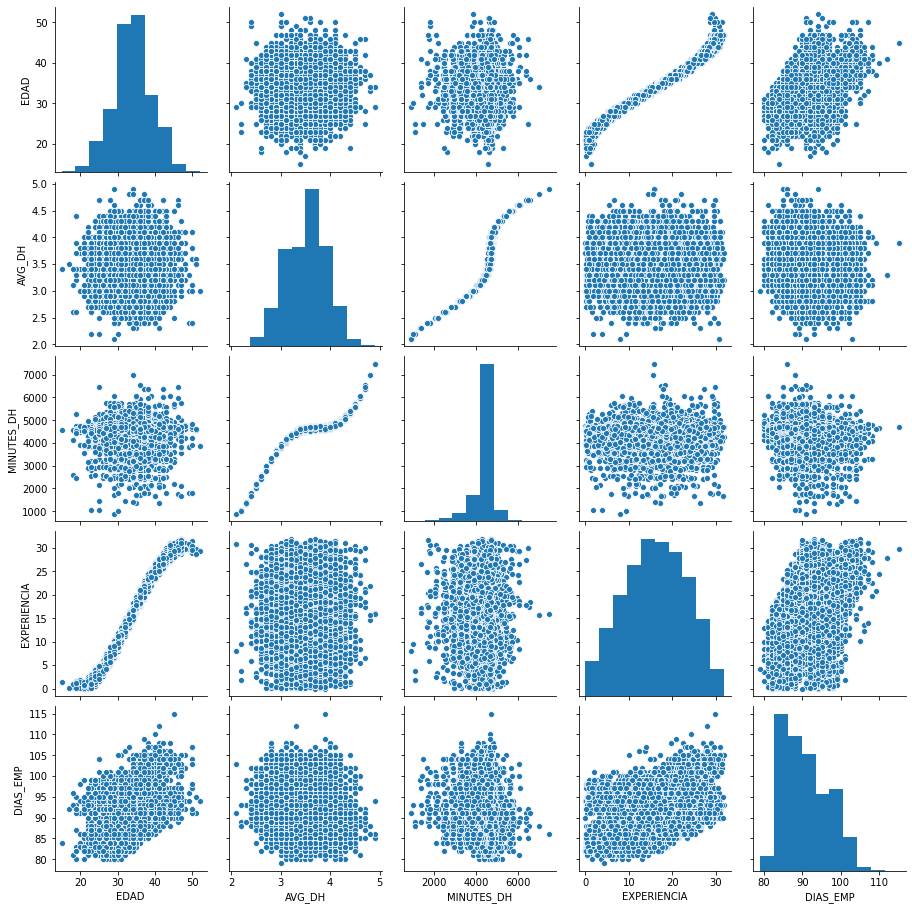

In [35]:
sns.pairplot(df[['EDAD', 'GENERO', 'RESIDENCIA', 'NV_ESTUDIO',
       'ESTUDIO_PREV', 'TRACK_DH', 'AVG_DH', 'MINUTES_DH', 'EXPERIENCIA',
       'DIAS_EMP']])

In [39]:
df.columns

Index(['Unnamed: 0', 'EDAD', 'GENERO', 'RESIDENCIA', 'NV_ESTUDIO',
       'ESTUDIO_PREV', 'TRACK_DH', 'AVG_DH', 'MINUTES_DH', 'EXPERIENCIA',
       'DIAS_EMP'],
      dtype='object')

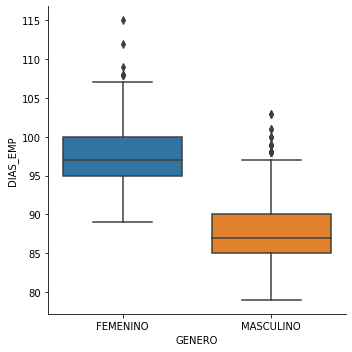

In [47]:
sns.catplot(x='GENERO',y='DIAS_EMP',kind='box',data=df)

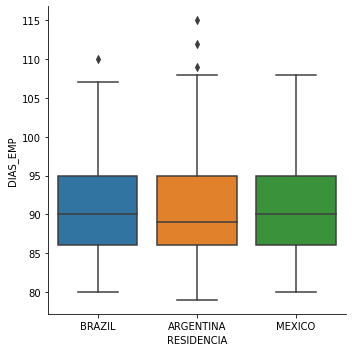

In [46]:
sns.catplot(x='RESIDENCIA',y='DIAS_EMP',kind='box',data=df)

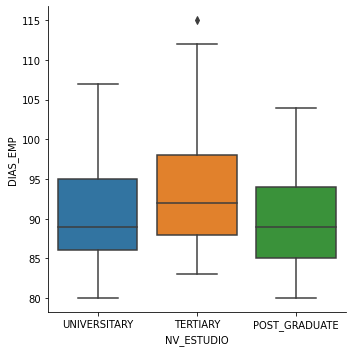

In [48]:
sns.catplot(x='NV_ESTUDIO',y='DIAS_EMP',kind='box',data=df)

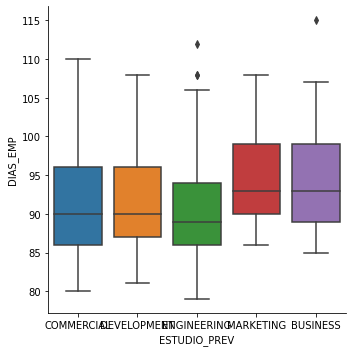

In [49]:
sns.catplot(x='ESTUDIO_PREV',y='DIAS_EMP',kind='box',data=df)

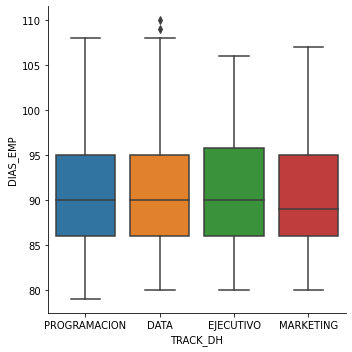

In [50]:
sns.catplot(x='TRACK_DH',y='DIAS_EMP',kind='box',data=df)

## Baseline Model

In [ ]:
X=df[]

# KNN

In [ ]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/654986294958/master/train_dataset_digitalhouse.csv
df_training_dataset = pd.read_csv(r'train_dataset_digitalhouse.csv')
df_training_dataset=pd.get_dummies(df_training_dataset, columns=['GENERO','RESIDENCIA','NV_ESTUDIO','ESTUDIO_PREV','TRACK_DH'])

#imputar

for i in ['EDAD','AVG_DH','MINUTES_DH','EXPERIENCIA']:
    df_training_dataset.loc[df_training_dataset[i].isnull(),[i]]=df_training_dataset[i].mean()
    
#from sklearn.impute import KNNImputer
#imp=KNNImputer(n_neighbors=30, weights="uniform")
#imp.fit(df_training_dataset)
#df_training_dataset=pd.DataFrame(imp.transform(df_training_dataset),columns=df_training_dataset.columns)    

#from sklearn.experimental import enable_iterative_imputer
#from sklearn.impute import IterativeImputer
#imp = IterativeImputer(max_iter=30, random_state=0)
#imp.fit(df_training_dataset)
#df_training_dataset=pd.DataFrame(imp.transform(df_training_dataset),columns=df_training_dataset.columns) 


#escalar
#for i in ['EDAD','AVG_DH','MINUTES_DH','EXPERIENCIA']:
#    df_training_dataset[i]=(df_training_dataset[i]-df_training_dataset[i].mean())/df_training_dataset[i].std()
    
#for i in ['EDAD','AVG_DH','MINUTES_DH','EXPERIENCIA']:
#    df_training_dataset[i]=(df_training_dataset[i]-df_training_dataset[i].min(axis=0))/(df_training_dataset[i].max(axis=0)-df_training_dataset[i].min(axis=0))


features=['EDAD', 
          #'AVG_DH',
          'MINUTES_DH', 'EXPERIENCIA',
       'GENERO_FEMENINO', 'GENERO_MASCULINO', 'RESIDENCIA_ARGENTINA',
       #'RESIDENCIA_BRAZIL', 'RESIDENCIA_MEXICO', 'NV_ESTUDIO_POST_GRADUATE',
       'NV_ESTUDIO_TERTIARY', 'NV_ESTUDIO_UNIVERSITARY',
       'ESTUDIO_PREV_BUSINESS', 'ESTUDIO_PREV_COMMERCIAL',
       'ESTUDIO_PREV_DEVELOPMENT', 'ESTUDIO_PREV_ENGINEERING',
       'ESTUDIO_PREV_MARKETING', 
        #'TRACK_DH_DATA', 'TRACK_DH_EJECUTIVO','TRACK_DH_MARKETING', 'TRACK_DH_PROGRAMACION'
         ]
target='DIAS_EMP'

In [ ]:
probar=['EDAD','AVG_DH','MINUTES_DH','EXPERIENCIA','GENERO','RESIDENCIA','NV_ESTUDIO','ESTUDIO_PREV','TRACK_DH']
combinaciones=[]
for i in range(10):
    for j in combinations(probar,i):
        if len(list(j))>0:
            combinaciones.append(list(j))
            
genero=['GENERO_MASCULINO','GENERO_FEMENINO']
residencia=['RESIDENCIA_ARGENTINA','RESIDENCIA_BRAZIL','RESIDENCIA_MEXICO']
nv_estudio=['NV_ESTUDIO_POST_GRADUATE','NV_ESTUDIO_TERTIARY','NV_ESTUDIO_UNIVERSITARY']
estudio_prev=['ESTUDIO_PREV_BUSINESS', 'ESTUDIO_PREV_COMMERCIAL','ESTUDIO_PREV_DEVELOPMENT', 'ESTUDIO_PREV_ENGINEERING','ESTUDIO_PREV_MARKETING']
track_dh=['TRACK_DH_DATA', 'TRACK_DH_EJECUTIVO','TRACK_DH_MARKETING', 'TRACK_DH_PROGRAMACION']
            
probar=[]
for i in combinaciones:
    lista=i
    if 'GENERO' in i:
        lista.remove('GENERO')
        lista.extend(genero)
    if 'RESIDENCIA' in i:
        lista.remove('RESIDENCIA')
        lista.extend(residencia)
    if 'NV_ESTUDIO' in i:
        lista.remove('NV_ESTUDIO')
        lista.extend(nv_estudio)
    if 'ESTUDIO_PREV' in i:
        lista.remove('ESTUDIO_PREV')
        lista.extend(estudio_prev)
    if 'TRACK_DH' in i:
        lista.remove('TRACK_DH')
        lista.extend(track_dh)
    probar.append(lista)

In [ ]:
#promedios=[]
#hola=0
#for grupo in probar:
#    X=df_training_dataset[grupo]
#    y=df_training_dataset['DIAS_EMP']
#    knn= KNeighborsRegressor(n_neighbors=10)
#    cv=cross_validate(knn,X,y,cv=10,scoring='r2')
#    promedios.append([grupo,cv['test_score'].mean()])
#    print(hola)
#    hola=hola+1

In [ ]:
#pd.DataFrame(promedios).sort_values(by=1,ascending=False).head().loc[419,0]

In [ ]:
#promedios=[]
#for i in range(1,30):
#    X=df_training_dataset[features]
#    y=df_training_dataset[target]
#    knn= KNeighborsRegressor(n_neighbors=i)
#    cv=cross_validate(knn,X,y,cv=10,scoring='r2')
#    promedios.append([i,cv['test_score'].mean()])
#pd.DataFrame(promedios).sort_values(by=1,ascending=False)

In [ ]:
X=df_training_dataset[features]
y=df_training_dataset[target]
knn= KNeighborsRegressor(n_neighbors=19)
cv=cross_validate(knn,X,y,cv=10,scoring='r2')
print(cv['test_score'].mean())

# DecisionTree

In [ ]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/654986294958/master/train_dataset_digitalhouse.csv
df_training_dataset = pd.read_csv(r'train_dataset_digitalhouse.csv')
df_training_dataset=pd.get_dummies(df_training_dataset, columns=['GENERO','RESIDENCIA','NV_ESTUDIO','ESTUDIO_PREV','TRACK_DH'])

#imputar

#for i in ['EDAD','AVG_DH','MINUTES_DH','EXPERIENCIA']:
#    df_training_dataset.loc[df_training_dataset[i].isnull(),[i]]=df_training_dataset[i].median()
    
#from sklearn.impute import KNNImputer
#imp=KNNImputer(n_neighbors=30, weights="uniform")
#imp.fit(df_training_dataset)
#df_training_dataset=pd.DataFrame(imp.transform(df_training_dataset),columns=df_training_dataset.columns)    

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=18, random_state=0)
imp.fit(df_training_dataset)
df_training_dataset=pd.DataFrame(imp.transform(df_training_dataset),columns=df_training_dataset.columns) 


#escalar

#for i in ['EDAD','AVG_DH','MINUTES_DH','EXPERIENCIA']:
#    df_training_dataset[i]=(df_training_dataset[i]-df_training_dataset[i].mean())/df_training_dataset[i].std()
    
#for i in ['EDAD','AVG_DH','MINUTES_DH','EXPERIENCIA']:
#    df_training_dataset[i]=(df_training_dataset[i]-df_training_dataset[i].min(axis=0))/(df_training_dataset[i].max(axis=0)-df_training_dataset[i].min(axis=0))


features=['EDAD', 
          #'AVG_DH',
          #'MINUTES_DH', 
          #'EXPERIENCIA',
       'GENERO_FEMENINO', 'GENERO_MASCULINO', 
    #'RESIDENCIA_ARGENTINA','RESIDENCIA_BRAZIL', 'RESIDENCIA_MEXICO', 'NV_ESTUDIO_POST_GRADUATE',
       'NV_ESTUDIO_TERTIARY', 'NV_ESTUDIO_UNIVERSITARY',
       'ESTUDIO_PREV_BUSINESS', 'ESTUDIO_PREV_COMMERCIAL',
       'ESTUDIO_PREV_DEVELOPMENT', 'ESTUDIO_PREV_ENGINEERING',
       'ESTUDIO_PREV_MARKETING', 
         #'TRACK_DH_DATA', 'TRACK_DH_EJECUTIVO','TRACK_DH_MARKETING', 'TRACK_DH_PROGRAMACION'
         ]
target='DIAS_EMP'

In [ ]:
probar=['EDAD','AVG_DH','MINUTES_DH','EXPERIENCIA','GENERO','RESIDENCIA','NV_ESTUDIO','ESTUDIO_PREV','TRACK_DH']
combinaciones=[]
for i in range(10):
    for j in combinations(probar,i):
        if len(list(j))>0:
            combinaciones.append(list(j))
            
genero=['GENERO_MASCULINO','GENERO_FEMENINO']
residencia=['RESIDENCIA_ARGENTINA','RESIDENCIA_BRAZIL','RESIDENCIA_MEXICO']
nv_estudio=['NV_ESTUDIO_POST_GRADUATE','NV_ESTUDIO_TERTIARY','NV_ESTUDIO_UNIVERSITARY']
estudio_prev=['ESTUDIO_PREV_BUSINESS', 'ESTUDIO_PREV_COMMERCIAL','ESTUDIO_PREV_DEVELOPMENT', 'ESTUDIO_PREV_ENGINEERING','ESTUDIO_PREV_MARKETING']
track_dh=['TRACK_DH_DATA', 'TRACK_DH_EJECUTIVO','TRACK_DH_MARKETING', 'TRACK_DH_PROGRAMACION']
            
probar=[]
for i in combinaciones:
    lista=i
    if 'GENERO' in i:
        lista.remove('GENERO')
        lista.extend(genero)
    if 'RESIDENCIA' in i:
        lista.remove('RESIDENCIA')
        lista.extend(residencia)
    if 'NV_ESTUDIO' in i:
        lista.remove('NV_ESTUDIO')
        lista.extend(nv_estudio)
    if 'ESTUDIO_PREV' in i:
        lista.remove('ESTUDIO_PREV')
        lista.extend(estudio_prev)
    if 'TRACK_DH' in i:
        lista.remove('TRACK_DH')
        lista.extend(track_dh)
    probar.append(lista)

In [ ]:
promedios=[]
hola=0
for grupo in probar:
    X=df_training_dataset[grupo]
    y=df_training_dataset[target]
    dtr= DecisionTreeRegressor(max_depth=8)
    cv=cross_validate(dtr,X,y,cv=10,scoring='r2')
    promedios.append([grupo,cv['test_score'].mean()])
    #print(hola)
    #hola=hola+1

In [ ]:
pd.DataFrame(promedios).sort_values(by=1,ascending=False).loc[178,0]

In [ ]:
#X=df_training_dataset[features]
#y=df_training_dataset[target]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
#dtr= DecisionTreeRegressor()
#values={'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28],'max_features':[1,2,3,4,5,6,7,8,9,10]}
#grid=GridSearchCV(dtr, param_grid = values,scoring = 'r2')
#grid.fit(X_train,y_train)
#print(grid.best_params_)

In [ ]:
X=df_training_dataset[features]
y=df_training_dataset[target]
dtr= DecisionTreeRegressor(max_depth=7,max_features=8)
cv=cross_validate(dtr,X,y,cv=10,scoring='r2')
print(cv['test_score'].mean())

# Lasso

In [ ]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/654986294958/master/train_dataset_digitalhouse.csv
df_training_dataset = pd.read_csv(r'train_dataset_digitalhouse.csv')
df_training_dataset=pd.get_dummies(df_training_dataset, columns=['GENERO','RESIDENCIA','NV_ESTUDIO','ESTUDIO_PREV','TRACK_DH'])

#imputar

#for i in ['EDAD','AVG_DH','MINUTES_DH','EXPERIENCIA']:
#    df_training_dataset.loc[df_training_dataset[i].isnull(),[i]]=df_training_dataset[i].median()
    
#from sklearn.impute import KNNImputer
#imp=KNNImputer(n_neighbors=5, weights="uniform")
#imp.fit(df_training_dataset)
#df_training_dataset=pd.DataFrame(imp.transform(df_training_dataset),columns=df_training_dataset.columns)    

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=18, random_state=0)
imp.fit(df_training_dataset)
df_training_dataset=pd.DataFrame(imp.transform(df_training_dataset),columns=df_training_dataset.columns) 


#escalar

#for i in ['EDAD','AVG_DH','MINUTES_DH','EXPERIENCIA']:
#    df_training_dataset[i]=(df_training_dataset[i]-df_training_dataset[i].mean())/df_training_dataset[i].std()
    
#for i in ['EDAD','AVG_DH','MINUTES_DH','EXPERIENCIA']:
#    df_training_dataset[i]=(df_training_dataset[i]-df_training_dataset[i].min(axis=0))/(df_training_dataset[i].max(axis=0)-df_training_dataset[i].min(axis=0))


features=['EDAD', 
          'AVG_DH',
          'MINUTES_DH', 
          #'EXPERIENCIA',
       'GENERO_FEMENINO', 'GENERO_MASCULINO', 
    #'RESIDENCIA_ARGENTINA','RESIDENCIA_BRAZIL', 'RESIDENCIA_MEXICO', 
    'NV_ESTUDIO_POST_GRADUATE','NV_ESTUDIO_TERTIARY', 'NV_ESTUDIO_UNIVERSITARY',
       'ESTUDIO_PREV_BUSINESS', 'ESTUDIO_PREV_COMMERCIAL',
       'ESTUDIO_PREV_DEVELOPMENT', 'ESTUDIO_PREV_ENGINEERING',
       'ESTUDIO_PREV_MARKETING', 
         #'TRACK_DH_DATA', 'TRACK_DH_EJECUTIVO','TRACK_DH_MARKETING', 'TRACK_DH_PROGRAMACION'
         ]
target='DIAS_EMP'

In [ ]:
probar=['EDAD','AVG_DH','MINUTES_DH','EXPERIENCIA','GENERO','RESIDENCIA','NV_ESTUDIO','ESTUDIO_PREV','TRACK_DH']
combinaciones=[]
for i in range(10):
    for j in combinations(probar,i):
        if len(list(j))>0:
            combinaciones.append(list(j))
            
genero=['GENERO_MASCULINO','GENERO_FEMENINO']
residencia=['RESIDENCIA_ARGENTINA','RESIDENCIA_BRAZIL','RESIDENCIA_MEXICO']
nv_estudio=['NV_ESTUDIO_POST_GRADUATE','NV_ESTUDIO_TERTIARY','NV_ESTUDIO_UNIVERSITARY']
estudio_prev=['ESTUDIO_PREV_BUSINESS', 'ESTUDIO_PREV_COMMERCIAL','ESTUDIO_PREV_DEVELOPMENT', 'ESTUDIO_PREV_ENGINEERING','ESTUDIO_PREV_MARKETING']
track_dh=['TRACK_DH_DATA', 'TRACK_DH_EJECUTIVO','TRACK_DH_MARKETING', 'TRACK_DH_PROGRAMACION']
            
probar=[]
for i in combinaciones:
    lista=i
    if 'GENERO' in i:
        lista.remove('GENERO')
        lista.extend(genero)
    if 'RESIDENCIA' in i:
        lista.remove('RESIDENCIA')
        lista.extend(residencia)
    if 'NV_ESTUDIO' in i:
        lista.remove('NV_ESTUDIO')
        lista.extend(nv_estudio)
    if 'ESTUDIO_PREV' in i:
        lista.remove('ESTUDIO_PREV')
        lista.extend(estudio_prev)
    if 'TRACK_DH' in i:
        lista.remove('TRACK_DH')
        lista.extend(track_dh)
    probar.append(lista)

In [ ]:
promedios=[]
hola=0
for grupo in probar:
    X=df_training_dataset[grupo]
    y=df_training_dataset[target]
    lasso= linear_model.Lasso(alpha=0.01)
    cv=cross_validate(lasso,X,y,cv=10,scoring='r2')
    promedios.append([grupo,cv['test_score'].mean()])
    #print(hola)
    #hola=hola+1

In [ ]:
pd.DataFrame(promedios).sort_values(by=1,ascending=False).loc[394,0]

In [ ]:
X=df_training_dataset[features]
y=df_training_dataset[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
lasso= linear_model.Lasso()
values={'alpha':[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.5,1.8,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,20,30,50,100,1000,2000,10000]}
grid=GridSearchCV(lasso, param_grid = values,scoring = 'r2')
grid.fit(X_train,y_train)
print(grid.best_params_)

In [ ]:
X=df_training_dataset[features]
y=df_training_dataset[target]
lasso= linear_model.Lasso(alpha=0.01)
cv=cross_validate(lasso,X,y,cv=10,scoring='r2')
print([cv['test_score'].mean()])

# Ridge

In [ ]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/654986294958/master/train_dataset_digitalhouse.csv
df_training_dataset = pd.read_csv(r'train_dataset_digitalhouse.csv')
df_training_dataset=pd.get_dummies(df_training_dataset, columns=['GENERO','RESIDENCIA','NV_ESTUDIO','ESTUDIO_PREV','TRACK_DH'])

#imputar

#for i in ['EDAD','AVG_DH','MINUTES_DH','EXPERIENCIA']:
#    df_training_dataset.loc[df_training_dataset[i].isnull(),[i]]=df_training_dataset[i].median()
    
#from sklearn.impute import KNNImputer
#imp=KNNImputer(n_neighbors=5, weights="uniform")
#imp.fit(df_training_dataset)
#df_training_dataset=pd.DataFrame(imp.transform(df_training_dataset),columns=df_training_dataset.columns)    

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=15, random_state=0)
imp.fit(df_training_dataset)
df_training_dataset=pd.DataFrame(imp.transform(df_training_dataset),columns=df_training_dataset.columns) 


#escalar

#for i in ['EDAD','AVG_DH','MINUTES_DH','EXPERIENCIA']:
#    df_training_dataset[i]=(df_training_dataset[i]-df_training_dataset[i].mean())/df_training_dataset[i].std()
    
#for i in ['EDAD','AVG_DH','MINUTES_DH','EXPERIENCIA']:
#    df_training_dataset[i]=(df_training_dataset[i]-df_training_dataset[i].min(axis=0))/(df_training_dataset[i].max(axis=0)-df_training_dataset[i].min(axis=0))


features=['EDAD', 
          'AVG_DH',
          'MINUTES_DH', 
          'EXPERIENCIA',
       'GENERO_FEMENINO', 'GENERO_MASCULINO', 
    'RESIDENCIA_ARGENTINA','RESIDENCIA_BRAZIL', 'RESIDENCIA_MEXICO', 
    'NV_ESTUDIO_POST_GRADUATE','NV_ESTUDIO_TERTIARY', 'NV_ESTUDIO_UNIVERSITARY',
       'ESTUDIO_PREV_BUSINESS', 'ESTUDIO_PREV_COMMERCIAL',
       'ESTUDIO_PREV_DEVELOPMENT', 'ESTUDIO_PREV_ENGINEERING',
       'ESTUDIO_PREV_MARKETING', 
         #'TRACK_DH_DATA', 'TRACK_DH_EJECUTIVO','TRACK_DH_MARKETING', 'TRACK_DH_PROGRAMACION'
         ]
target='DIAS_EMP'

In [ ]:
probar=['EDAD','AVG_DH','MINUTES_DH','EXPERIENCIA','GENERO','RESIDENCIA','NV_ESTUDIO','ESTUDIO_PREV','TRACK_DH']
combinaciones=[]
for i in range(10):
    for j in combinations(probar,i):
        if len(list(j))>0:
            combinaciones.append(list(j))
            
genero=['GENERO_MASCULINO','GENERO_FEMENINO']
residencia=['RESIDENCIA_ARGENTINA','RESIDENCIA_BRAZIL','RESIDENCIA_MEXICO']
nv_estudio=['NV_ESTUDIO_POST_GRADUATE','NV_ESTUDIO_TERTIARY','NV_ESTUDIO_UNIVERSITARY']
estudio_prev=['ESTUDIO_PREV_BUSINESS', 'ESTUDIO_PREV_COMMERCIAL','ESTUDIO_PREV_DEVELOPMENT', 'ESTUDIO_PREV_ENGINEERING','ESTUDIO_PREV_MARKETING']
track_dh=['TRACK_DH_DATA', 'TRACK_DH_EJECUTIVO','TRACK_DH_MARKETING', 'TRACK_DH_PROGRAMACION']
            
probar=[]
for i in combinaciones:
    lista=i
    if 'GENERO' in i:
        lista.remove('GENERO')
        lista.extend(genero)
    if 'RESIDENCIA' in i:
        lista.remove('RESIDENCIA')
        lista.extend(residencia)
    if 'NV_ESTUDIO' in i:
        lista.remove('NV_ESTUDIO')
        lista.extend(nv_estudio)
    if 'ESTUDIO_PREV' in i:
        lista.remove('ESTUDIO_PREV')
        lista.extend(estudio_prev)
    if 'TRACK_DH' in i:
        lista.remove('TRACK_DH')
        lista.extend(track_dh)
    probar.append(lista)

In [ ]:
promedios=[]
hola=0
for grupo in probar:
    X=df_training_dataset[grupo]
    y=df_training_dataset[target]
    ridge= linear_model.Ridge(alpha=0.7)
    cv=cross_validate(ridge,X,y,cv=10,scoring='r2')
    promedios.append([grupo,cv['test_score'].mean()])
    #print(hola)
    #hola=hola+1

In [ ]:
pd.DataFrame(promedios).sort_values(by=1,ascending=False)

In [ ]:
X=df_training_dataset[features]
y=df_training_dataset[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
ridge= linear_model.Ridge()
values={'alpha':[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.5,1.8,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,20,30,50,100,1000,2000,10000]}
grid=GridSearchCV(ridge, param_grid = values,scoring = 'r2')
grid.fit(X_train,y_train)
print(grid.best_params_)

In [ ]:
X=df_training_dataset[features]
y=df_training_dataset[target]
ridge= linear_model.Ridge(alpha=0.7)
cv=cross_validate(ridge,X,y,cv=10,scoring='r2')
print([cv['test_score'].mean()])

# Gradient Boosting

In [ ]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/654986294958/master/train_dataset_digitalhouse.csv
df_training_dataset = pd.read_csv(r'train_dataset_digitalhouse.csv')
df_training_dataset=pd.get_dummies(df_training_dataset, columns=['GENERO','RESIDENCIA','NV_ESTUDIO','ESTUDIO_PREV','TRACK_DH'])

features=['EDAD', 
          'AVG_DH',
          'MINUTES_DH', 
          #'EXPERIENCIA',
        'GENERO_FEMENINO', 'GENERO_MASCULINO', 
        'RESIDENCIA_ARGENTINA','RESIDENCIA_BRAZIL', 'RESIDENCIA_MEXICO', 
        'NV_ESTUDIO_POST_GRADUATE','NV_ESTUDIO_TERTIARY', 'NV_ESTUDIO_UNIVERSITARY',
       'ESTUDIO_PREV_BUSINESS', 'ESTUDIO_PREV_COMMERCIAL',
       'ESTUDIO_PREV_DEVELOPMENT', 'ESTUDIO_PREV_ENGINEERING',
       'ESTUDIO_PREV_MARKETING', 
         #'TRACK_DH_DATA', 'TRACK_DH_EJECUTIVO','TRACK_DH_MARKETING', 'TRACK_DH_PROGRAMACION'
         ]
target='DIAS_EMP'


X=df_training_dataset.copy()[features]
y=df_training_dataset.copy()[target]

#for i in ['EDAD','AVG_DH','MINUTES_DH','EXPERIENCIA']:
#    X.loc[X[i].isnull(),[i]]=X[i].mean()
    
#from sklearn.impute import KNNImputer
#imp=KNNImputer(n_neighbors=10, weights="uniform")
#imp.fit(df_training_dataset)
#df_training_dataset=pd.DataFrame(imp.transform(df_training_dataset),columns=df_training_dataset.columns) 

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=15, random_state=0)
imp.fit(X)
X=pd.DataFrame(imp.transform(X),columns=X.columns)

#iso = IsolationForest(contamination=0.3)
#yhat = iso.fit_predict(X)
#X.loc[yhat==-1,['EDAD','AVG_DH','MINUTES_DH','EXPERIENCIA']]=np.nan


#from sklearn.experimental import enable_iterative_imputer
#from sklearn.impute import IterativeImputer
#imp = IterativeImputer(max_iter=15, random_state=0)
#imp.fit(X)
#X=pd.DataFrame(imp.transform(X),columns=X.columns)

#escalar

#for i in ['EDAD','AVG_DH','MINUTES_DH','EXPERIENCIA']:
#    df_training_dataset[i]=(df_training_dataset[i]-df_training_dataset[i].mean())/df_training_dataset[i].std()
    
#for i in ['EDAD','AVG_DH','MINUTES_DH','EXPERIENCIA']:
#    df_training_dataset[i]=(df_training_dataset[i]-df_training_dataset[i].min(axis=0))/(df_training_dataset[i].max(axis=0)-df_training_dataset[i].min(axis=0))


In [ ]:
probar=['EDAD','AVG_DH','MINUTES_DH','EXPERIENCIA','GENERO','RESIDENCIA','NV_ESTUDIO','ESTUDIO_PREV','TRACK_DH']
combinaciones=[]
for i in range(10):
    for j in combinations(probar,i):
        if len(list(j))>0:
            combinaciones.append(list(j))
            
genero=['GENERO_MASCULINO','GENERO_FEMENINO']
residencia=['RESIDENCIA_ARGENTINA','RESIDENCIA_BRAZIL','RESIDENCIA_MEXICO']
nv_estudio=['NV_ESTUDIO_POST_GRADUATE','NV_ESTUDIO_TERTIARY','NV_ESTUDIO_UNIVERSITARY']
estudio_prev=['ESTUDIO_PREV_BUSINESS', 'ESTUDIO_PREV_COMMERCIAL','ESTUDIO_PREV_DEVELOPMENT', 'ESTUDIO_PREV_ENGINEERING','ESTUDIO_PREV_MARKETING']
track_dh=['TRACK_DH_DATA', 'TRACK_DH_EJECUTIVO','TRACK_DH_MARKETING', 'TRACK_DH_PROGRAMACION']
            
probar=[]
for i in combinaciones:
    lista=i
    if 'GENERO' in i:
        lista.remove('GENERO')
        lista.extend(genero)
    if 'RESIDENCIA' in i:
        lista.remove('RESIDENCIA')
        lista.extend(residencia)
    if 'NV_ESTUDIO' in i:
        lista.remove('NV_ESTUDIO')
        lista.extend(nv_estudio)
    if 'ESTUDIO_PREV' in i:
        lista.remove('ESTUDIO_PREV')
        lista.extend(estudio_prev)
    if 'TRACK_DH' in i:
        lista.remove('TRACK_DH')
        lista.extend(track_dh)
    probar.append(lista)

In [ ]:
promedios=[]
hola=0
for grupo in probar:
    X=df_training_dataset[grupo]
    y=df_training_dataset[target]
    xgb_reg = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.09,max_depth = 5, n_estimators = 120,n_jobs=-1)
    cv=cross_validate(xgb_reg,X,y,cv=3,scoring='r2')
    promedios.append([grupo,cv['test_score'].mean()])
    print(hola)
    hola=hola+1

In [ ]:
pd.DataFrame(promedios).sort_values(by=1,ascending=False)

In [ ]:
X=df_training_dataset[features]
y=df_training_dataset[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
xgb_reg = xgb.XGBRegressor(n_jobs=-1,learning_rate=0.09,max_depth=5)
values={'learning_rate':[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
       'max_depth':[5,6,7,8,9,10,11,12,13,14,15]}
grid=GridSearchCV(xgb_reg, param_grid = values,scoring = 'r2')
grid.fit(X_train,y_train)
print(grid.best_params_)

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
gbreg = GradientBoostingRegressor(learning_rate=0.13,n_estimators=90,max_depth=3,alpha=0.9)
cv=cross_validate(gbreg,X,y,cv=5,scoring='r2')
print([cv['test_score'].mean()])

# USANDO MIS ULTIMAS ARMAS

In [ ]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/654986294958/master/train_dataset_digitalhouse.csv
df_training_dataset = pd.read_csv(r'train_dataset_digitalhouse.csv')
df_training_dataset=pd.get_dummies(df_training_dataset, columns=['GENERO','RESIDENCIA','NV_ESTUDIO','ESTUDIO_PREV','TRACK_DH'])

features=['EDAD', 
          'AVG_DH',
          'MINUTES_DH', 
          'EXPERIENCIA',
           'GENERO_FEMENINO', 
          'GENERO_MASCULINO', 
            'RESIDENCIA_ARGENTINA','RESIDENCIA_BRAZIL', 'RESIDENCIA_MEXICO', 
            'NV_ESTUDIO_POST_GRADUATE','NV_ESTUDIO_TERTIARY', 'NV_ESTUDIO_UNIVERSITARY',
            'ESTUDIO_PREV_BUSINESS', 'ESTUDIO_PREV_COMMERCIAL',
           'ESTUDIO_PREV_DEVELOPMENT', 'ESTUDIO_PREV_ENGINEERING',
           'ESTUDIO_PREV_MARKETING', 
             #'TRACK_DH_DATA', 'TRACK_DH_EJECUTIVO','TRACK_DH_MARKETING', 'TRACK_DH_PROGRAMACION'
         ]
target='DIAS_EMP'


X=df_training_dataset.copy()[features]
y=df_training_dataset.copy()[target]


Q1_edad = X['EDAD'].quantile(0.25)
Q3_edad = X['EDAD'].quantile(0.75)
IQR_edad = Q3_edad - Q1_edad
X['EDADINF']=np.where(X['EDAD'] < (Q1_edad - 1.5 * IQR_edad),1,0)
X['EDADSUP']=np.where(X['EDAD'] > (Q3_edad + 1.5 * IQR_edad),1,0)
X.loc[(X['EDAD'] < (Q1_edad - 1.5 * IQR_edad)),['EDAD']]=(Q1_edad - 1.5 * IQR_edad)
X.loc[(X['EDAD'] > (Q3_edad + 1.5 * IQR_edad)),['EDAD']]=(Q3_edad + 1.5 * IQR_edad)

Q1_avg = X['AVG_DH'].quantile(0.25)
Q3_avg = X['AVG_DH'].quantile(0.75)
IQR_avg = Q3_avg - Q1_avg
X['AVGINF']=np.where(X['AVG_DH'] < (Q1_avg - 1.5 * IQR_avg),1,0)
X['AVGSUP']=np.where(X['AVG_DH'] > (Q3_avg + 1.5 * IQR_avg),1,0)
X.loc[(X['AVG_DH'] < (Q1_avg - 1.5 * IQR_avg)),['AVG_DH']]=(Q1_avg - 1.5 * IQR_avg)
X.loc[(X['AVG_DH'] > (Q3_avg + 1.5 * IQR_avg)),['AVG_DH']]=(Q3_avg + 1.5 * IQR_avg)

Q1_min = X['MINUTES_DH'].quantile(0.25)
Q3_min = X['MINUTES_DH'].quantile(0.75)
IQR_min = Q3_min - Q1_min
#X['MININF']=np.where(X['MINUTES_DH'] < (Q1_avg - 1.5 * IQR_avg),1,0)
#X['MINSUP']=np.where(X['MINUTES_DH'] > (Q3_avg + 1.5 * IQR_avg),1,0)
X.loc[(X['MINUTES_DH'] < (Q1_min - 1.5 * IQR_min)),['MINUTES_DH']]=(Q1_min - 1.5 * IQR_min)
X.loc[(X['MINUTES_DH'] > (Q3_min + 1.5 * IQR_min)),['MINUTES_DH']]=(Q3_min + 1.5 * IQR_min)


Q1_exp = X['EXPERIENCIA'].quantile(0.25)
Q3_exp = X['EXPERIENCIA'].quantile(0.75)
IQR_exp = Q3_exp - Q1_exp
X.loc[(X['EXPERIENCIA'] < (Q1_exp - 1.5 * IQR_exp)),['EXPERIENCIA']]=(Q1_exp - 1.5 * IQR_exp)
X.loc[(X['EXPERIENCIA'] > (Q3_exp + 1.5 * IQR_exp)),['EXPERIENCIA']]=(Q3_exp + 1.5 * IQR_exp)

# #Detectando outliers
# for i in ['EDAD','AVG_DH','MINUTES_DH','EXPERIENCIA']:
#     Q1 = X[i].quantile(0.25)
#     Q3 = X[i].quantile(0.75)
#     IQR = Q3 - Q1
#     X.loc[(X[i] < (Q1 - 1.5 * IQR)),[i]]=(Q1 - 1.5 * IQR)
#     #X.loc[(X[i] < (Q1 - 1.5 * IQR)),[i]]=0
#     X.loc[(X[i] > (Q3 + 1.5* IQR)),[i]]=(Q3 + 1.5 * IQR)
#     #X.loc[(X[i] > (Q3 + 1.5 * IQR)),[i]]=0

X_imputar=X.copy()[['EDAD','AVG_DH','MINUTES_DH','EXPERIENCIA','GENERO_MASCULINO','GENERO_FEMENINO']]
imp = IterativeImputer(max_iter=15)
imp.fit(X_imputar)
X_imputar=pd.DataFrame(imp.transform(X_imputar),columns=X_imputar.columns)

for i in list(X_imputar.columns):
     X[i]=X_imputar[i]
    
#for i in ['EDAD','AVG_DH','MINUTES_DH','EXPERIENCIA']:
#    X[i]=(X[i]-X[i].mean())/X[i].std()

#for i in ['EDAD','AVG_DH','MINUTES_DH','EXPERIENCIA']:
#    X[i]=(X[i]-X[i].min(axis=0))/(X[i].max(axis=0)-X[i].min(axis=0))

#X.drop(labels=['ESTUDIO_PREV_MARKETING'],axis=1,inplace=True)

gbreg = xgb.XGBRegressor(learning_rate=0.14,n_estimators=90,max_depth=3,alpha=0.9,n_jobs=-1)
cv=cross_validate(gbreg,X,y,cv=15,scoring='r2')
print([cv['test_score'].mean()])
print([cv['test_score']])

In [ ]:
X.shape

In [ ]:
gbreg_final=xgb.XGBRegressor(learning_rate=0.14,n_estimators=90,max_depth=3,alpha=0.9,n_jobs=-1)
gbreg_final.fit(X,y)

In [ ]:
X.MINUTES_DH

<hr>

## Completar los datos necesarios para entregar la solución

### Como entrega de su solución, esperamos los resultados numéricos predichos por su modelo. Como entrada utilizará el archivo "to_be_scored.csv"

In [ ]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/654986294958/master/to_be_scored_digitalhouse.csv
df_to_be_scored = pd.read_csv(r'to_be_scored_digitalhouse.csv')
df_to_be_scored.tail()

In [ ]:
df_to_be_scored.isnull().sum()

# ¡Atención!

### El marco de datos ``to_be_scored`` es su "hoja de evaluación". Tenga en cuenta que la columna "target" no existe en esta muestra, por lo que no se puede utilizar para modelos de entrenamiento basados en el aprendizaje supervisado.

# ¡Atención!

### Debes realizar los mismos pasos de procesamiento previo que hiciste en el conjunto de datos de entrenamiento antes de calificar la "hoja de respuestas"

In [ ]:
df_to_be_scored=pd.get_dummies(df_to_be_scored, columns=['GENERO','RESIDENCIA','NV_ESTUDIO','ESTUDIO_PREV','TRACK_DH'])

In [ ]:
features_scored=['EDAD', 
          'AVG_DH',
          'MINUTES_DH', 
          'EXPERIENCIA',
           'GENERO_FEMENINO', 
          'GENERO_MASCULINO', 
            'RESIDENCIA_ARGENTINA','RESIDENCIA_BRAZIL', 'RESIDENCIA_MEXICO', 
            'NV_ESTUDIO_POST_GRADUATE','NV_ESTUDIO_TERTIARY', 'NV_ESTUDIO_UNIVERSITARY',
            'ESTUDIO_PREV_BUSINESS', 'ESTUDIO_PREV_COMMERCIAL',
           'ESTUDIO_PREV_DEVELOPMENT', 'ESTUDIO_PREV_ENGINEERING',
           'ESTUDIO_PREV_MARKETING']
X_scored=df_to_be_scored.copy()[features_scored]

X_scored['EDADINF']=np.where(X_scored['EDAD'] < (Q1_edad - 1.5 * IQR_edad),1,0)
X_scored['EDADSUP']=np.where(X_scored['EDAD'] > (Q3_edad + 1.5 * IQR_edad),1,0)
X_scored.loc[(X_scored['EDAD'] < (Q1_edad - 1.5 * IQR_edad)),['EDAD']]=(Q1_edad - 1.5 * IQR_edad)
X_scored.loc[(X_scored['EDAD'] > (Q3_edad + 1.5 * IQR_edad)),['EDAD']]=(Q3_edad + 1.5 * IQR_edad)

X_scored['AVGINF']=np.where(X_scored['AVG_DH'] < (Q1_avg - 1.5 * IQR_avg),1,0)
X_scored['AVGSUP']=np.where(X_scored['AVG_DH'] > (Q3_avg + 1.5 * IQR_avg),1,0)
X_scored.loc[(X_scored['AVG_DH'] < (Q1_avg - 1.5 * IQR_avg)),['AVG_DH']]=(Q1_avg - 1.5 * IQR_avg)
X_scored.loc[(X_scored['AVG_DH'] > (Q3_avg + 1.5 * IQR_avg)),['AVG_DH']]=(Q3_avg + 1.5 * IQR_avg)

X_scored.loc[(X_scored['MINUTES_DH'] < (Q1_min - 1.5 * IQR_min)),['MINUTES_DH']]=(Q1_min - 1.5 * IQR_min)
X_scored.loc[(X_scored['MINUTES_DH'] > (Q3_min + 1.5 * IQR_min)),['MINUTES_DH']]=(Q3_min + 1.5 * IQR_min)

X_scored.loc[(X_scored['EXPERIENCIA'] < (Q1_exp - 1.5 * IQR_exp)),['EXPERIENCIA']]=(Q1_exp - 1.5 * IQR_exp)
X_scored.loc[(X_scored['EXPERIENCIA'] > (Q3_exp + 1.5 * IQR_exp)),['EXPERIENCIA']]=(Q3_exp + 1.5 * IQR_exp)

In [ ]:
X_imputar_scored=X_scored.copy()[['EDAD','AVG_DH','MINUTES_DH','EXPERIENCIA','GENERO_MASCULINO','GENERO_FEMENINO']]
X_imputar_scored=pd.DataFrame(imp.transform(X_imputar_scored),columns=X_imputar_scored.columns)
for i in list(X_imputar_scored.columns):
    X_scored[i]=X_imputar_scored[i]

<hr>

### Hacer las predicciones con el método "predict()" de sklearn y agregar los resultados en el marco de datos de la "hoja de evaluación"

In [ ]:
y_pred = gbreg_final.predict(X_scored)
X_scored['target'] = y_pred
X_scored.tail()

In [ ]:
X_scored.shape

# ¡Atención!

### La columna agregada con los resultados debe llamarse "target", de lo contrario, su envío fallará.

<hr>

### Exportar el marco de datos de resultados como un archivo .csv a su proyecto de Watson Studio.

In [ ]:
project.save_data(file_name="results.csv", data=X_scored.to_csv(index=False))